In [1]:
import os
from SigmoidData import SigmoidData
from csv_faking import *

In [2]:
if not os.path.exists("data"):
    os.mkdir("data")

Generates fake data and puts it into data/BP

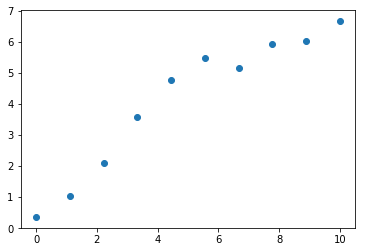

5.729630375120235 2.723245209276209 0 1.0528521840346894


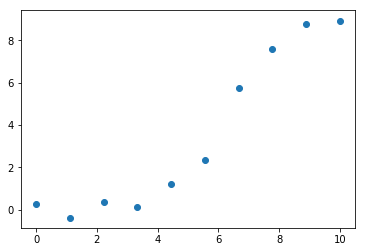

9.014198880758041 6.2909609561421185 0 0.9201421713807222


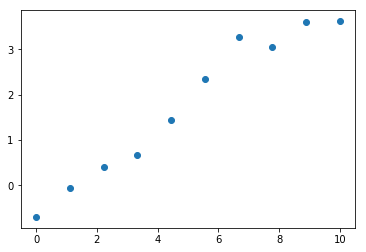

3.5509526436658185 4.836949955550817 0 0.9795886507560968


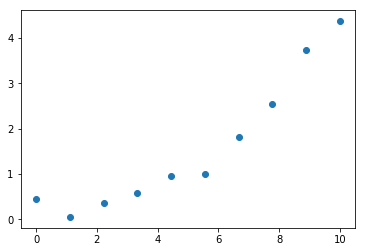

5.5060315102306046 7.794303676818188 0 1.6273483788770389


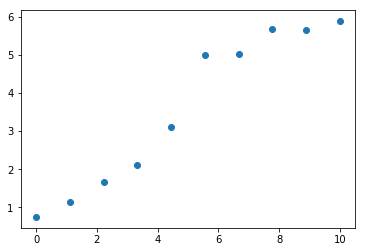

6.14276348441308 4.131645591281458 0 1.6488821054030378


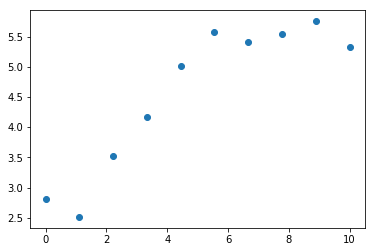

6.013250450509194 1.023388770169057 0 1.8647204138001083


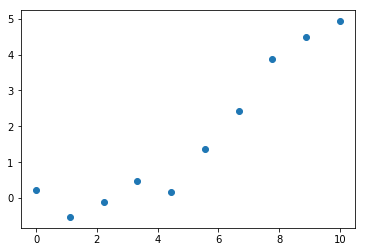

4.653846712305025 6.390293688266557 0 1.1374580472538518


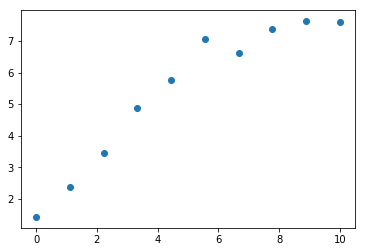

7.410693366544117 2.2943186894639 0 1.6487869479266744


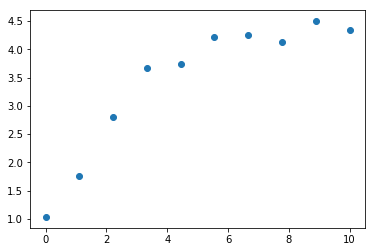

4.734786556254572 1.7429247111517898 0 1.5859626469993833


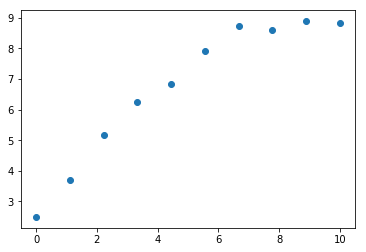

9.044957790813354 1.8289052145573836 0 1.897231938001553


In [3]:
actual_parameters  = []
for i in range(10):
    a = np.random.uniform(3, 10)
    h = np.random.uniform(0, 10)
    c = 0
    k = np.random.uniform(0.5, 2)
    create_many_fake_csvs(10, "data/BP"+str(i), a, h, c, k, noise = 0.3, plotting = True)
    actual_parameters.append([a,h,c,k])
    print(a,h,c,k)

Main body of curve fitting, results of maximum intensity vs concentration stored in sigmoid_fitted_trials

In [4]:
trials = os.listdir("data")
sigmoid_fitted_trials = []
for i, trial in enumerate(trials):
    name = "data/"+trial +"/"
    listed = os.listdir(name)
    fitted_curves = []
    for x in listed:
        fitted = curve_fit_from_csv(name+x) #fits the intensity vs time curve
        if fitted.r2 > 0.7:
            fitted_curves.append(fitted)
    xs = [curve.concentration for curve in fitted_curves]
    ys = [curve.curve_max for curve in fitted_curves]
    a = SigmoidData(xs, ys, concentration = i) #"concentration" is trial number here. Fits the maximum intensity vs concentration curve
   # a.plot()
    sigmoid_fitted_trials.append(a) 



Evaluation. First print: trial numbers, sorted by predicted k from lowest to highest, left to right.
Second print: Actual k corresponding to these trial numbers

k is a measure of horizontal stretch. Lower is a more "step-like" sigmoid.

In [5]:

sorted_by_trial = sorted(sigmoid_fitted_trials, key = lambda trial: trial.parameters[3])
print([x.concentration for x in sorted_by_trial])

actual_k_order_predicted = [actual_parameters[x.concentration][3] for x in sorted_by_trial]
print(actual_k_order_predicted)


[1, 5, 2, 4, 6, 8, 3, 7, 9, 0]
[0.9201421713807222, 1.8647204138001083, 0.9795886507560968, 1.6488821054030378, 1.1374580472538518, 1.5859626469993833, 1.6273483788770389, 1.6487869479266744, 1.897231938001553, 1.0528521840346894]


Code to evaluate how well this method sorts the data by k. Lower actual number of inversions is better. 

In [6]:
# Python3 program to count  
# inversions in an array 
  
def getInvCount(arr, n): 
  
    inv_count = 0
    for i in range(n): 
        for j in range(i + 1, n): 
            if (arr[i] > arr[j]): 
                inv_count += 1
  
    return inv_count 

arr = actual_k_order_predicted

n = len(arr) 
print("Number of inversions are", 
              getInvCount(arr, n)) 
  
print("Expected inversions are " +str( n*(n-1)/4))



Number of inversions are 17
Expected inversions are 22.5
